$\large \text{Euler:} 
\qquad\qquad\quad\begin{aligned}[t]
y_{n+1} &= y_n + f(x_n, y_n) h
\end{aligned}$

$\large \text{Midpoint:}
\qquad\quad\begin{aligned}[t]
k1 &= h f(x_n, y_n) \\
y_{n+1} &= y_{n} + h f(x_n + \frac{h}{2}, y_n + \frac{k1}{2})
\end{aligned}$

$\large \text{Runge-Kutta:}
\quad\begin{aligned}[t]
k1 &= h f(x_n, y_n) \\
k2 &= h f(x_n + h/2, y_n + k1/2) \\
k3 &= h f(x_n + h/2, y_n + k2/2) \\
k4 &= h f(x_n + h, y_n + k3) \\
y_{n+1} &= y_{n} + (k1 + 2k2 + 2k3 + k4)/6
\end{aligned}$


In [47]:

def euler(f1, x, y, h):
    return y + h * f1(x, y)

def midpoint(f1, x, y, h):
    k1 = h * f1(x, y)
    return y + h * f1(x + h / 2, y + k1 / 2)

def rk4(f1, x, y, h):
    k1 = h * f1(x, y)
    k2 = h * f1(x + h / 2, y + k1 / 2)
    k3 = h * f1(x + h / 2, y + k2 / 2)
    k4 = h * f1(x + h, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def caller(my_method, fn, y_ini, N, xs, h):
    y = y_ini
    ys = np.zeros((N, len(y_ini)), dtype=np.float64)
    for i in range(N):
        x = xs[i]
        ys[i, :] = y
        y = my_method(fn, x, y, h)
    return ys

In [48]:
import numpy as np

# Define the function f(x, y)
def f(x, y):
    return -x * y

# Parameters
h = 1.0e-1
x0 = 0.0

N = 51
xs = np.arange(x0, x0 + N * h, h)  # Generate range of x values

y_ini = np.asarray([1.0])  # Initial condition as a list to match numpy array operations

# Call the methods
ysE = caller(euler, f, y_ini, N, xs, h)
ysm = caller(midpoint, f, y_ini, N, xs, h)
ysrk4 = caller(rk4, f, y_ini, N, xs, h)


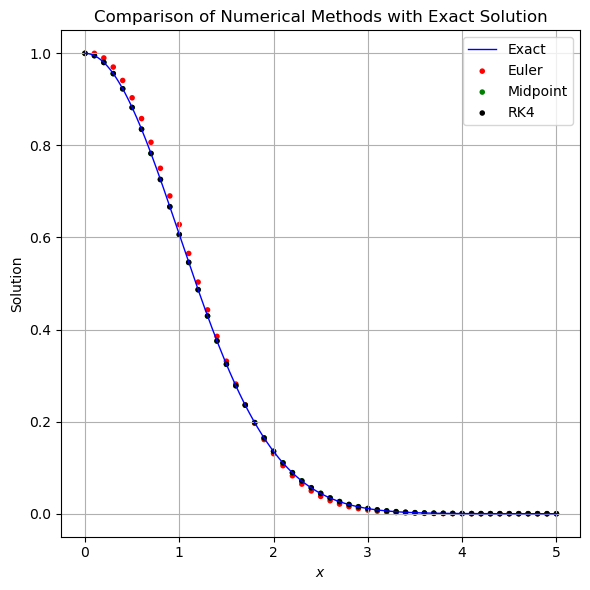

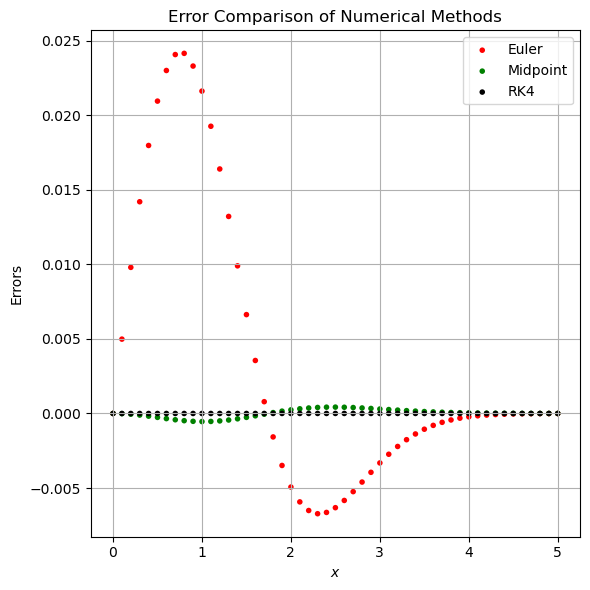

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Generate fine range
xfine = np.linspace(0.0, xs[-1], 1000)
yfine = np.exp(-xfine**2 / 2)
yexact = np.exp(-xs**2 / 2)

# Uncomment below for alternate definitions of yfine and yexact:
# yfine = xfine / 2 - np.sin(2 * xfine) / 4
# yexact = xs / 2 - np.sin(2 * xs) / 4

# Plot exact solution
plt.figure(figsize=(6, 6))
plt.plot(xfine, yfine, color='blue', linewidth=1, label='Exact')

# Add Euler method results
plt.scatter(xs, ysE, color='red', s=16, label='Euler', edgecolor='none')

# Add Midpoint method results
plt.scatter(xs, ysm, color='green', s=16, label='Midpoint', edgecolor='none')

# Add RK4 method results
plt.scatter(xs, ysrk4, color='black', s=16, label='RK4', edgecolor='none')

# Add labels, legend, and formatting
plt.xlabel(r"$x$")
plt.ylabel("Solution")
plt.legend()
plt.title("Comparison of Numerical Methods with Exact Solution")
plt.grid()
plt.tight_layout()
plt.show()

# Plot errors
plt.figure(figsize=(6, 6))

# Euler error
plt.scatter(xs, [y[0] for y in ysE] - yexact, color='red', s=16, label='Euler', edgecolor='none')

# Midpoint error
plt.scatter(xs, [y[0] for y in ysm] - yexact, color='green', s=16, label='Midpoint', edgecolor='none')

# RK4 error
plt.scatter(xs, [y[0] for y in ysrk4] - yexact, color='black', s=16, label='RK4', edgecolor='none')

# Add labels, legend, and formatting
plt.xlabel(r"$x$")
plt.ylabel("Errors")
plt.legend()
plt.title("Error Comparison of Numerical Methods")
plt.grid()
plt.tight_layout()
plt.show()


# Applied to dynamical systems
$\Large {\ddot{y} = -\gamma\dot{y} -y \\ 
\Rightarrow 
\begin{aligned}[t]
\dot{y} &= v \\
\dot{v} &= -\gamma v -y
\end{aligned}\\
\Rightarrow
\dfrac{d}{dt}\begin{pmatrix}y[1] \\ y[2]\end{pmatrix} = \begin{pmatrix}0 & 1\\-1 & -\gamma\end{pmatrix}\begin{pmatrix}y[1] \\ y[2]\end{pmatrix} = \begin{pmatrix}y[2] \\ -\gamma y[2] -y[1]\end{pmatrix} 
}$

In [50]:

# Define the function g(t, y)
def g(t, y):
    return np.asarray([y[1], -0.0 * y[1] - y[0]])

# Parameters
h = 1.0e-1
x0 = 0.0

N = 501
xs = np.arange(x0, x0 + N * h, h)  # Generate range of x values

y_ini = np.asarray([1.0, 0.0])  # Initial condition

# Call the methods
ysE = caller(euler, g, y_ini, N, xs, h)
ysm = caller(midpoint, g, y_ini, N, xs, h)
ysrk4 = caller(rk4, g, y_ini, N, xs, h)


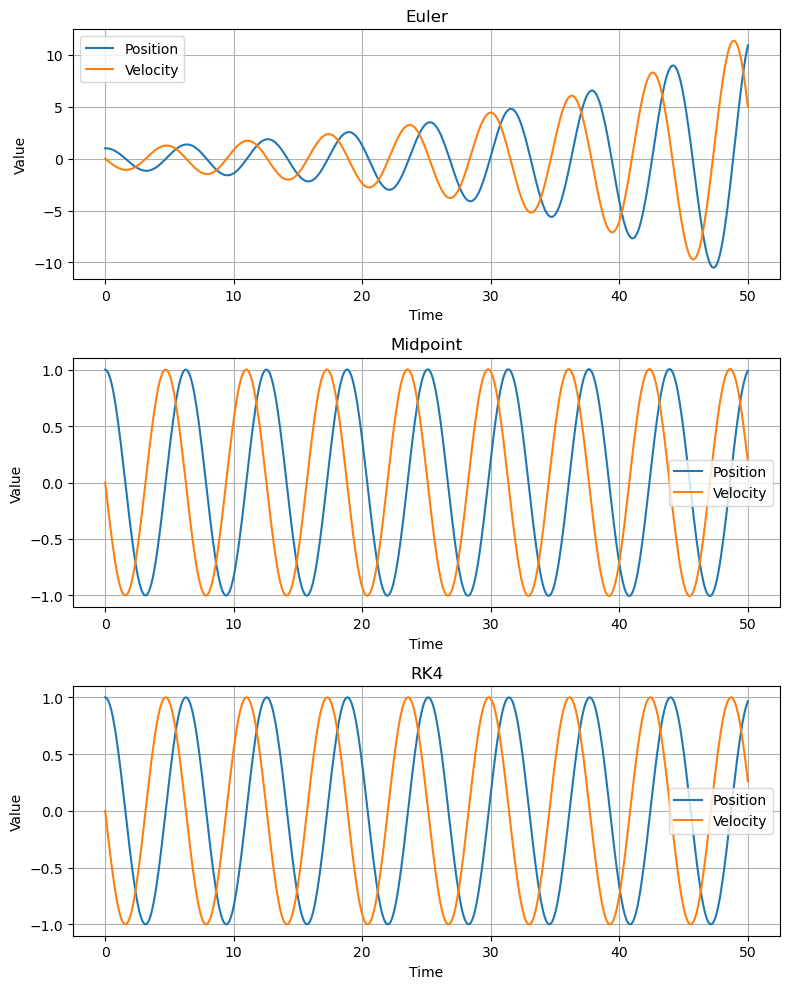

In [51]:
import matplotlib.pyplot as plt

# Plot for Euler method
plt.figure(figsize=(8, 10))

plt.subplot(3, 1, 1)
plt.plot(xs, ysE[:, 0], label="Position")
plt.plot(xs, ysE[:, 1], label="Velocity")
plt.title("Euler")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()

# Plot for Midpoint method
plt.subplot(3, 1, 2)
plt.plot(xs, ysm[:, 0], label="Position")
plt.plot(xs, ysm[:, 1], label="Velocity")
plt.title("Midpoint")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()

# Plot for RK4 method
plt.subplot(3, 1, 3)
plt.plot(xs, ysrk4[:, 0], label="Position")
plt.plot(xs, ysrk4[:, 1], label="Velocity")
plt.title("RK4")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


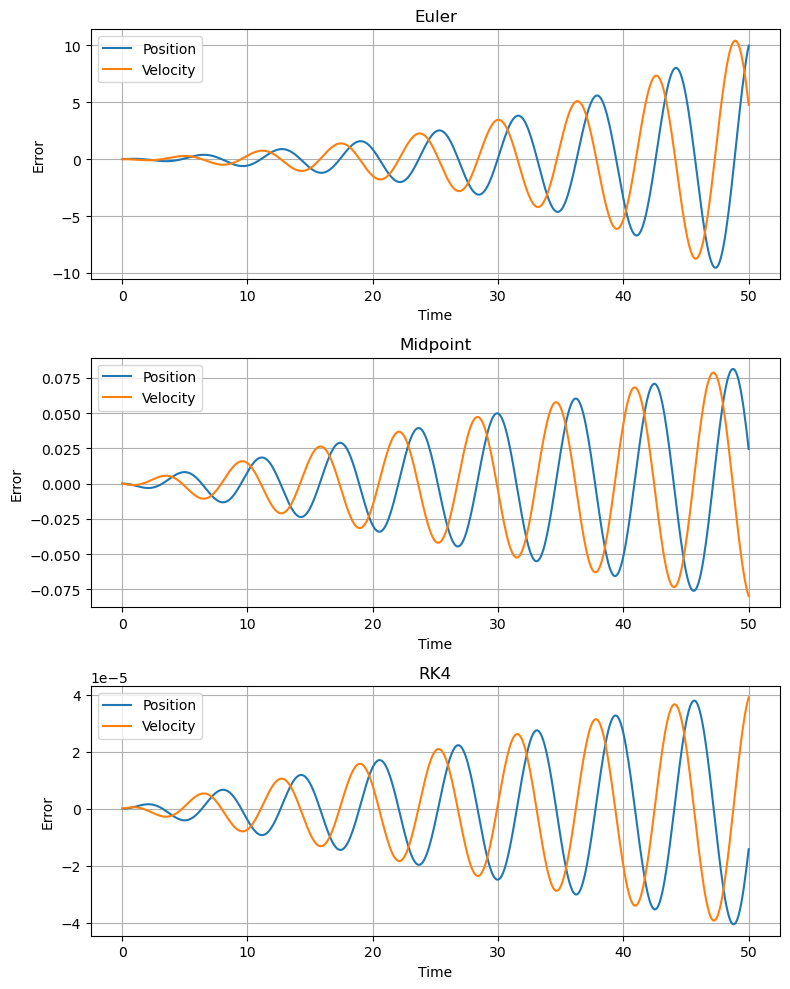

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Plot for Euler method
plt.figure(figsize=(8, 10))

plt.subplot(3, 1, 1)
plt.plot(xs, ysE[:, 0] - np.cos(xs), label="Position")
plt.plot(xs, ysE[:, 1] + np.sin(xs), label="Velocity")
plt.title("Euler")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.ylabel("Error")
plt.grid()

# Plot for Midpoint method
plt.subplot(3, 1, 2)
plt.plot(xs, ysm[:, 0] - np.cos(xs), label="Position")
plt.plot(xs, ysm[:, 1] + np.sin(xs), label="Velocity")
plt.title("Midpoint")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.ylabel("Error")
plt.grid()

# Plot for RK4 method
plt.subplot(3, 1, 3)
plt.plot(xs, ysrk4[:, 0] - np.cos(xs), label="Position")
plt.plot(xs, ysrk4[:, 1] + np.sin(xs), label="Velocity")
plt.title("RK4")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.ylabel("Error")
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


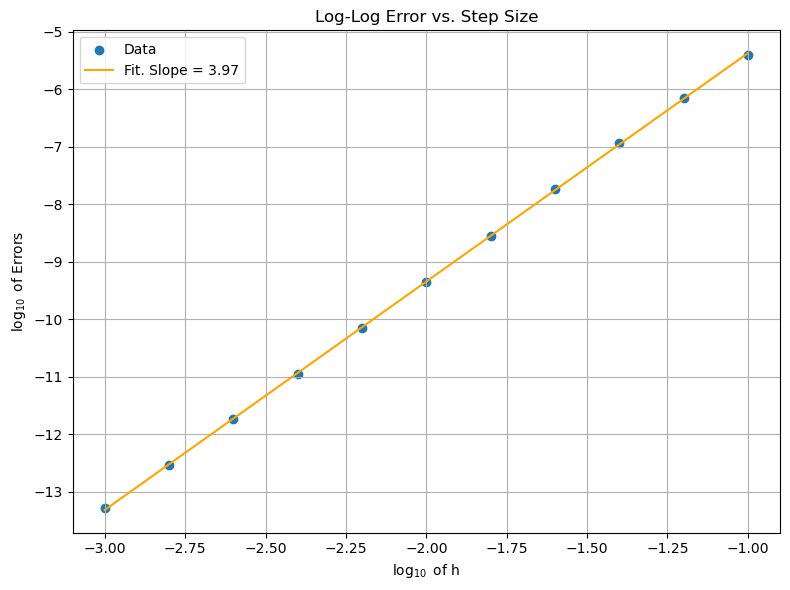

In [54]:
from scipy.optimize import curve_fit

# Define the range for h
hs = 10.0 ** np.arange(-3.0, -1.0 + 0.2, 0.2)

# Initialize parameters
x0 = 0.0
y_ini = [1.0, 0.0]

# Calculate errors at the end
errors = np.zeros(len(hs))
for i, h in enumerate(hs):
    xs = np.arange(x0, 10.0 + h, h)  # Generate xs up to 10.0 with step h
    N = len(xs)
    #ys = caller(midpoint, g, y_ini, N, xs, h)
    ys = caller(rk4, g, y_ini, N, xs, h)
    errors[i] = abs(ys[-1, 0] - np.cos(xs[-1]))

# Error data in log-log format
xd = np.log10(hs)
yd = np.log10(errors)

# Define the fitting function
def l(x, p1, p2):
    return p1 * x + p2

# Fit the data
params, _ = curve_fit(l, xd, yd, p0=[1.0, 1.0])

# Generate smooth fit
xfine = np.linspace(xd[0], xd[-1], 1000)
yfine = l(xfine, *params)

# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(xd, yd, label="Data")
plt.plot(xfine, yfine, label=f"Fit. Slope = {params[0]:.2f}", color="orange")
plt.xlabel(r"$\log_{10}$ of h")
plt.ylabel(r"$\log_{10}$ of Errors")
plt.legend(loc="upper left")
plt.grid()
plt.title("Log-Log Error vs. Step Size")
plt.tight_layout()
plt.show()
